
### Insights from the Pancreatic Cancer Prediction Dataset

1. **Overview of Dataset**:
- The dataset contains various features related to patients diagnosed with pancreatic cancer, including demographic data, clinical characteristics, and treatment information.
- Key columns include `Age`, `Gender`, `Survival_Status`, `Survival_Time_Months`, and several categorical features related to lifestyle and health access.

2. **Demographic Insights**:
- Analyze the age distribution to identify the most affected age groups.
- Examine the gender distribution among patients to determine if there’s a significant difference in diagnosis or survival rates.

3. **Survival Analysis**:
- Calculate the average survival time based on different stages of cancer at diagnosis.
- Present survival rates based on various factors, such as age, gender, and treatment type.

4. **Impact of Lifestyle Factors**:
- Investigate how lifestyle factors like physical activity level, diet, and alcohol consumption influence survival outcomes.
- Explore the correlation between obesity and survival rates.

5. **Healthcare Access**:
- Assess how access to healthcare services impacts patient outcomes.
- Compare survival rates between patients with different levels of access to healthcare.

6. **Feature Importance**:
- Use machine learning models to identify which features are most predictive of survival status.
- Highlight the top factors influencing patient outcomes, such as treatment type and stage at diagnosis.

7. **Data Quality and Challenges**:
- Discuss the presence of missing values and how they were handled (e.g., imputation methods).
- Comment on any potential biases in the dataset, such as underrepresentation of certain demographic groups.

8. **Future Work**:
- Suggest areas for further research, such as the inclusion of genetic data or more detailed treatment histories.
- Propose the development of predictive models to assist healthcare providers in making informed treatment decisions.

---

### Conclusion
By leveraging this dataset, we can uncover critical insights into pancreatic cancer diagnosis and treatment, ultimately contributing to better patient outcomes and healthcare strategies.

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# 1. Load the dataset
df = pd.read_csv('/kaggle/input/pancreatic-cancer-prediction-dataset/pancreatic_cancer_prediction_sample.csv')


In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Country                        50000 non-null  object
 1   Age                            50000 non-null  int64 
 2   Gender                         50000 non-null  object
 3   Smoking_History                50000 non-null  int64 
 4   Obesity                        50000 non-null  int64 
 5   Diabetes                       50000 non-null  int64 
 6   Chronic_Pancreatitis           50000 non-null  int64 
 7   Family_History                 50000 non-null  int64 
 8   Hereditary_Condition           50000 non-null  int64 
 9   Jaundice                       50000 non-null  int64 
 10  Abdominal_Discomfort           50000 non-null  int64 
 11  Back_Pain                      50000 non-null  int64 
 12  Weight_Loss                    50000 non-null  int64 
 13  D

In [4]:
print(df.describe())

                Age  Smoking_History       Obesity      Diabetes  \
count  50000.000000     50000.000000  50000.000000  50000.000000   
mean      64.540940         0.299540      0.248260      0.199980   
std        9.973847         0.458061      0.432008      0.399989   
min       30.000000         0.000000      0.000000      0.000000   
25%       58.000000         0.000000      0.000000      0.000000   
50%       65.000000         0.000000      0.000000      0.000000   
75%       71.000000         1.000000      0.000000      0.000000   
max       90.000000         1.000000      1.000000      1.000000   

       Chronic_Pancreatitis  Family_History  Hereditary_Condition  \
count          50000.000000    50000.000000          50000.000000   
mean               0.099300        0.151680              0.049440   
std                0.299067        0.358714              0.216787   
min                0.000000        0.000000              0.000000   
25%                0.000000        0.00000

In [5]:
# 2. Analyze missing values
missing_values = df.isnull().sum()
if missing_values.any():
    print("Missing values per column:")
    print(missing_values[missing_values > 0])

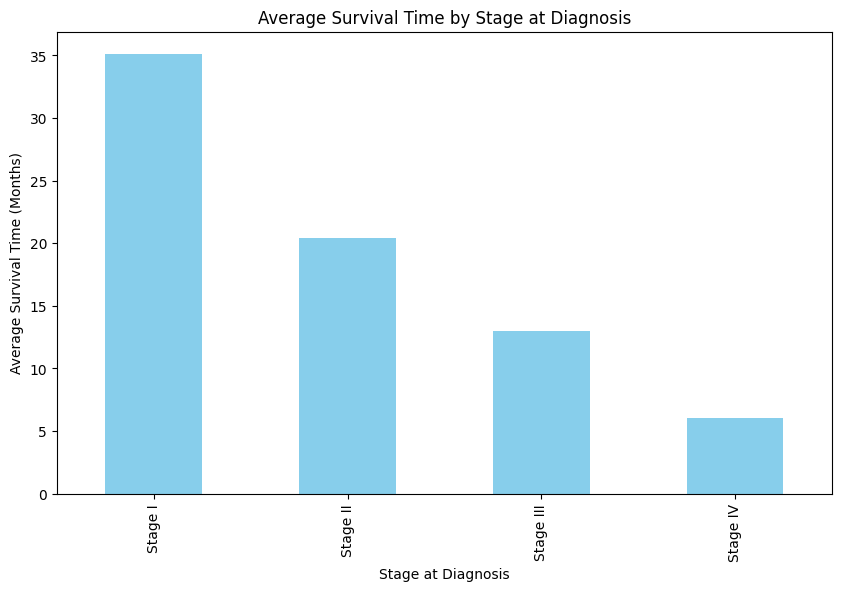

In [6]:

stage_survival = df.groupby('Stage_at_Diagnosis')['Survival_Time_Months'].mean()

plt.figure(figsize=(10, 6))
stage_survival.plot(kind='bar', color='skyblue')
plt.title('Average Survival Time by Stage at Diagnosis')
plt.xlabel('Stage at Diagnosis')
plt.ylabel('Average Survival Time (Months)')
plt.show()

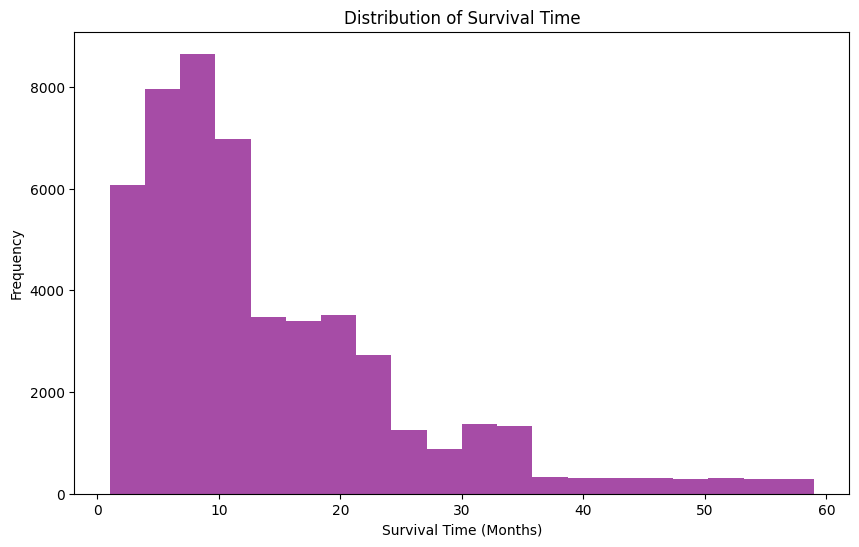

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['Survival_Time_Months'], bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Survival Time')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Frequency')
plt.show()

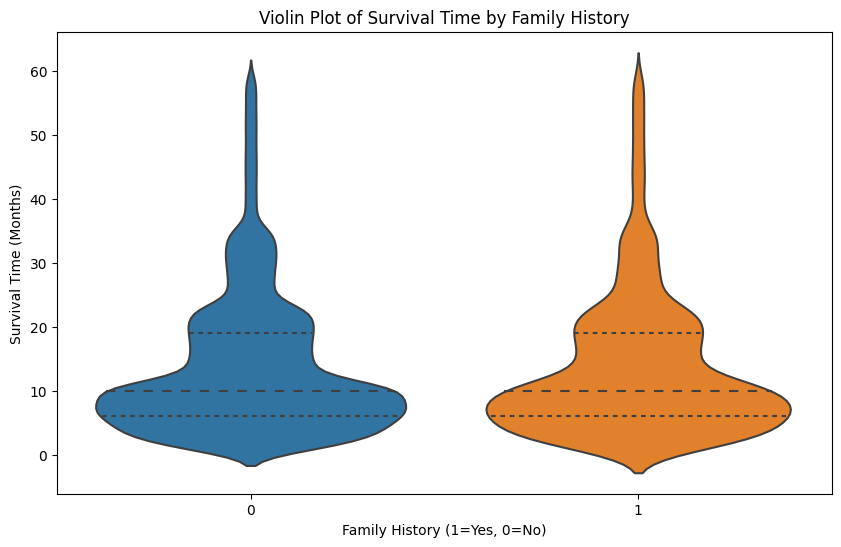

In [8]:
import seaborn as sns 
plt.figure(figsize=(10, 6))
sns.violinplot(x='Family_History', y='Survival_Time_Months', data=df, inner='quartile')
plt.title('Violin Plot of Survival Time by Family History')
plt.xlabel('Family History (1=Yes, 0=No)')
plt.ylabel('Survival Time (Months)')
plt.show()

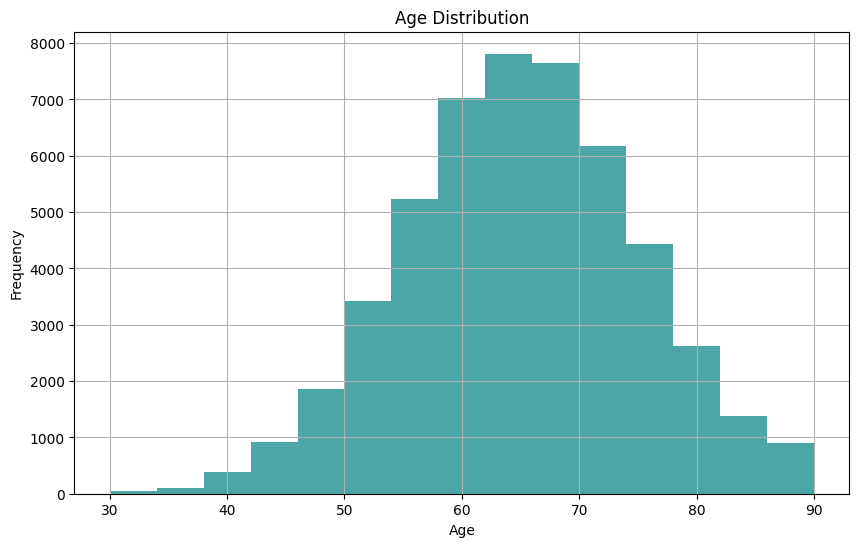

In [9]:
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=15, color='teal', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

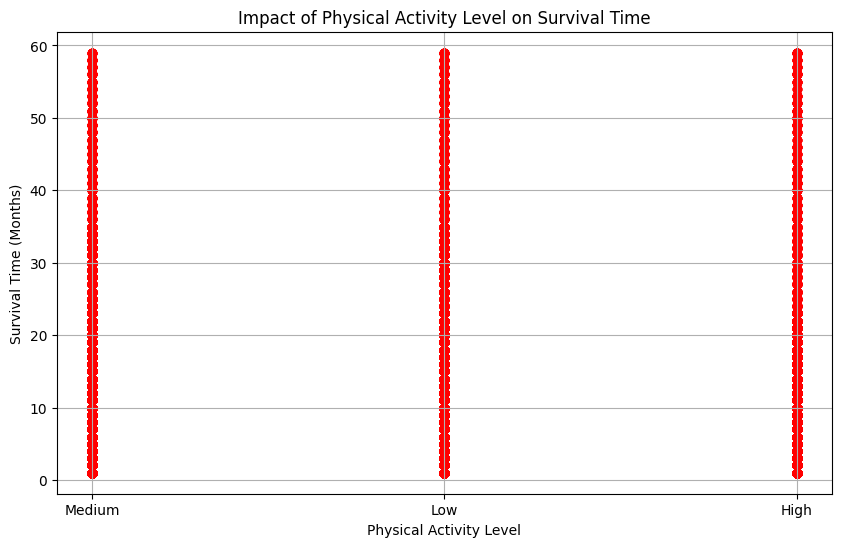

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Physical_Activity_Level'], df['Survival_Time_Months'], c='red', alpha=0.5)
plt.title('Impact of Physical Activity Level on Survival Time')
plt.xlabel('Physical Activity Level')
plt.ylabel('Survival Time (Months)')
plt.grid()
plt.show()

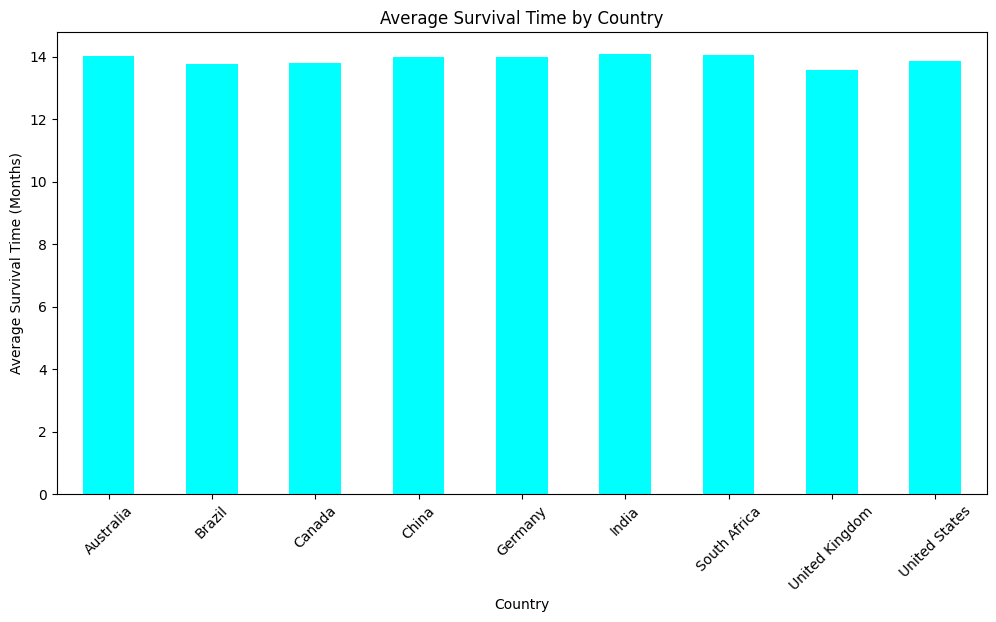

In [11]:
plt.figure(figsize=(12, 6))
df.groupby('Country')['Survival_Time_Months'].mean().plot(kind='bar', color='cyan')
plt.title('Average Survival Time by Country')
plt.ylabel('Average Survival Time (Months)')
plt.xticks(rotation=45)
plt.show()

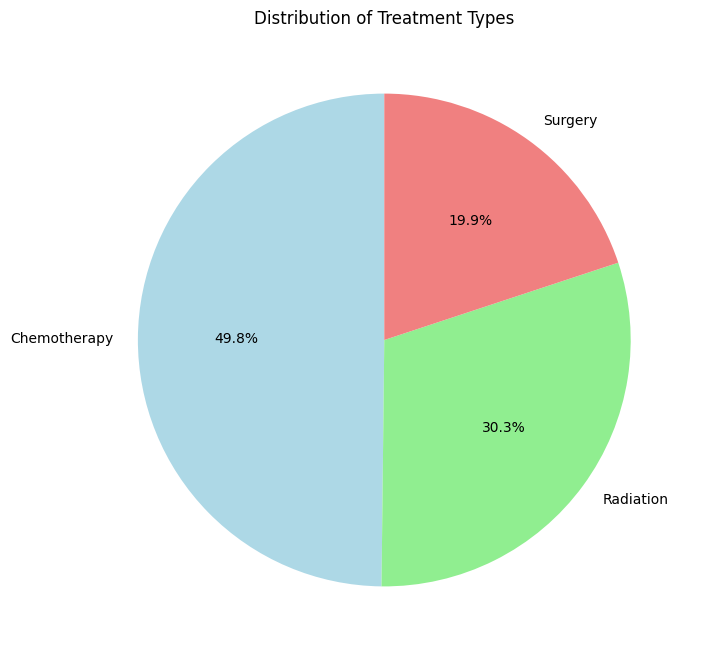

In [12]:
plt.figure(figsize=(8, 8))
df['Treatment_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Treatment Types')
plt.ylabel('')
plt.show()

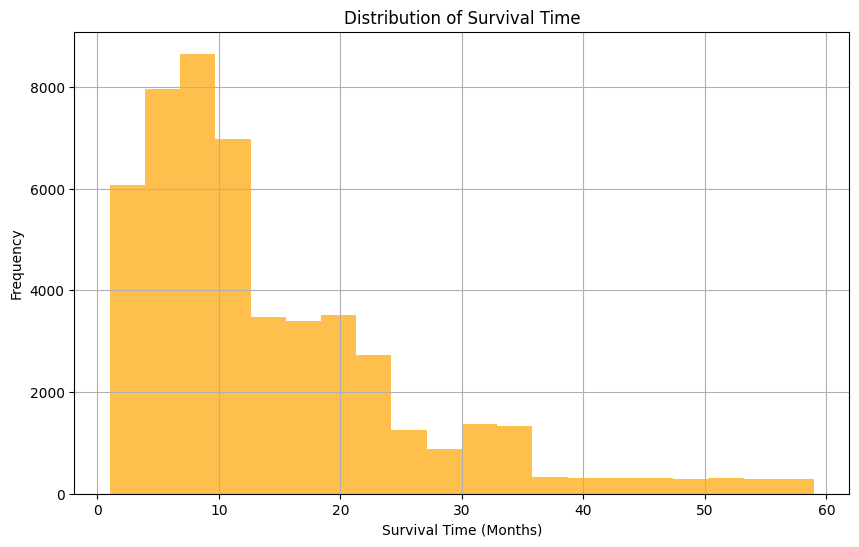

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['Survival_Time_Months'], bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Survival Time')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

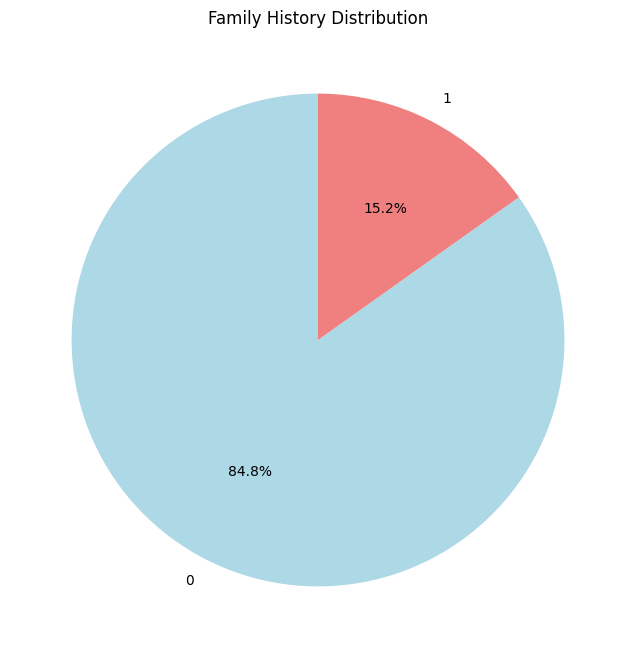

In [14]:
plt.figure(figsize=(8, 8))
df['Family_History'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Family History Distribution')
plt.ylabel('')
plt.show()

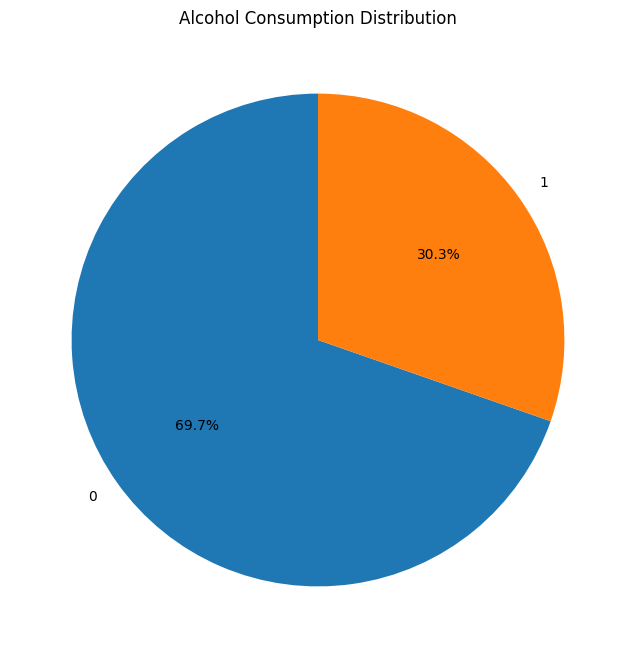

In [15]:
plt.figure(figsize=(8, 8))
df['Alcohol_Consumption'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Alcohol Consumption Distribution')
plt.ylabel('')
plt.show()

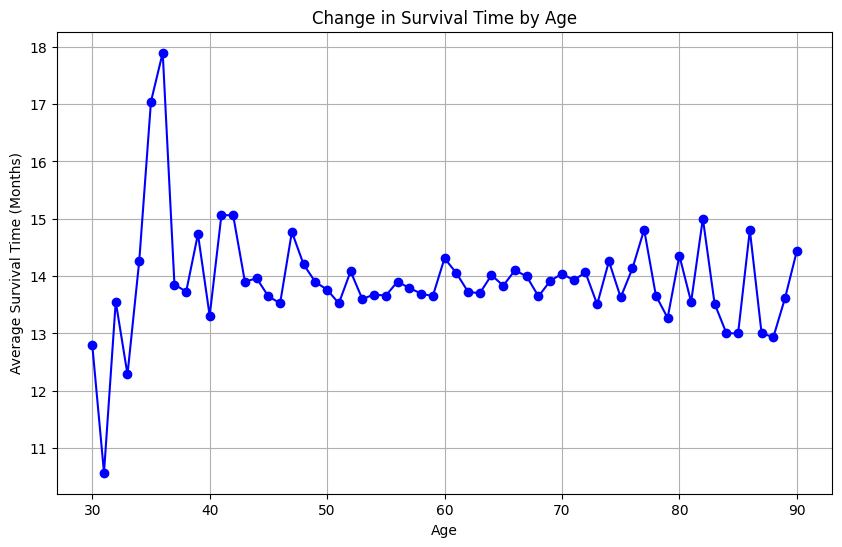

In [16]:
plt.figure(figsize=(10, 6))
age_mean_survival = df.groupby('Age')['Survival_Time_Months'].mean()
plt.plot(age_mean_survival.index, age_mean_survival.values, color='blue', linestyle='-', marker='o')
plt.title('Change in Survival Time by Age')
plt.xlabel('Age')
plt.ylabel('Average Survival Time (Months)')
plt.grid()
plt.show()

In [17]:
import plotly.express as px
fig = px.scatter(df, x='Age', y='Survival_Time_Months',
                 title='Age vs. Survival Time',
                 labels={'Survival_Time_Months': 'Survival Time (Months)', 'Age': 'Age'},
                 color='Gender')
fig.show()

In [18]:
age_mean_survival = df.groupby('Age')['Survival_Time_Months'].mean().reset_index()
fig = px.line(age_mean_survival, x='Age', y='Survival_Time_Months',
              title='Change in Survival Time by Age',
              labels={'Survival_Time_Months': 'Average Survival Time (Months)', 'Age': 'Age'})
fig.show()

In [19]:
fig = px.pie(df, names='Treatment_Type', title='Distribution of Treatment Types',
             labels={'Treatment_Type': 'Treatment Type'}, hole=0.3)
fig.show()

In [20]:
fig = px.box(df, x='Obesity', y='Survival_Time_Months',
             title='Box Plot of Survival Time by Obesity',
             labels={'Obesity': 'Obesity (1=Yes, 0=No)', 'Survival_Time_Months': 'Survival Time (Months)'})
fig.show()

In [21]:
fig = px.histogram(df, x='Alcohol_Consumption', color='Gender',
                   title='Alcohol Consumption Distribution by Gender',
                   labels={'Alcohol_Consumption': 'Alcohol Consumption'})
fig.update_traces(opacity=0.75)
fig.show()

In [22]:
# 3. Handle missing values
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [23]:
# For numeric columns, impute with median
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, impute with mode
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [24]:
# 4. Map ordinal categorical columns
ordinal_columns = [
    'Physical_Activity_Level',
    'Diet_Processed_Food',
    'Access_to_Healthcare'
]
ordinal_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
for col in ordinal_columns:
    df[col] = df[col].map(ordinal_mapping)

In [25]:
# 5. One-hot encode nominal categorical columns
nominal_columns = [
    'Gender', 'Country', 'Stage_at_Diagnosis',
    'Treatment_Type', 'Urban_vs_Rural', 'Economic_Status'
]
df = pd.get_dummies(df, columns=nominal_columns)

In [26]:
# 6. Define features and target variable
X = df.drop(['Survival_Status', 'Survival_Time_Months'], axis=1)
y = df['Survival_Status']

In [27]:
# 7. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# 8. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [29]:
# 9. Optimize model hyperparameters using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [30]:
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=5, random_state=42, n_jobs=-1
)

In [31]:
random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

Best parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}


In [32]:
# 10. Make predictions
y_pred = best_model.predict(X_test)

In [33]:
# 11. Evaluate the model
print("\nModel Performance:")
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Performance:
Accuracy: 0.873

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      8730
           1       0.00      0.00      0.00      1270

    accuracy                           0.87     10000
   macro avg       0.44      0.50      0.47     10000
weighted avg       0.76      0.87      0.81     10000



In [34]:
# 12. Perform cross-validation
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")


Cross-validation scores: [0.8716 0.8716 0.8716 0.8715 0.8715]
Average CV score: 0.872 (+/- 0.000)


In [35]:
# 13. Analyze feature importance
importance = best_model.feature_importances_
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values('Importance', ascending=False)

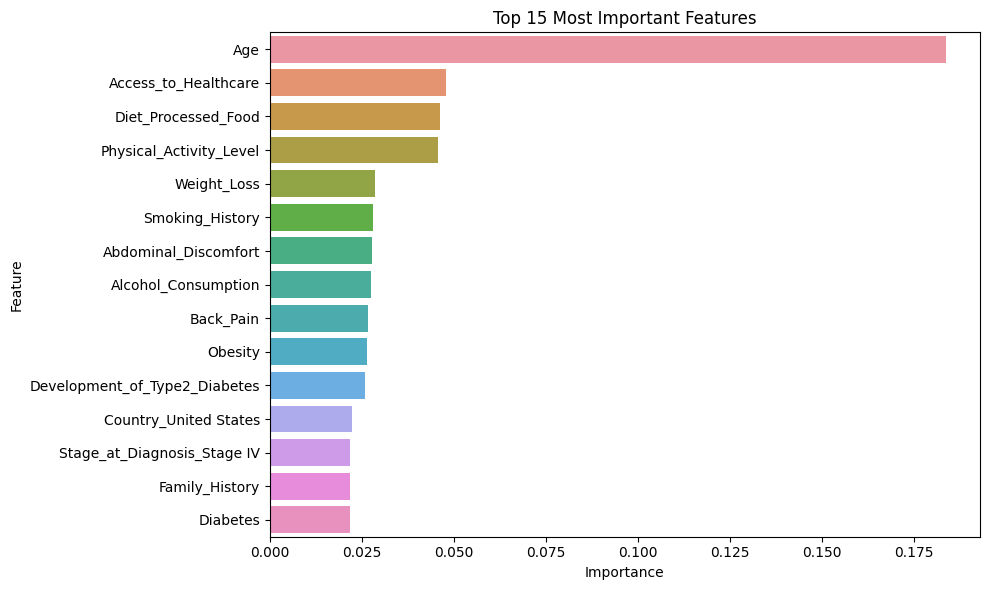

In [36]:
# 14. Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()

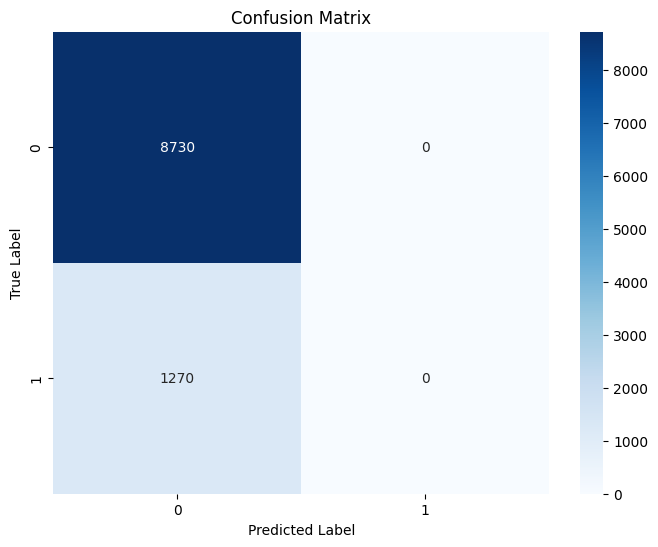

In [37]:
# 15. Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [38]:
import joblib
joblib.dump(best_model, 'random_forest_model.pkl')
loaded_model = joblib.load('random_forest_model.pkl')